<a href="https://colab.research.google.com/github/MatheusHenriqueDaSilva/data_science/blob/main/estudo_dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [77]:
DATA=pd.read_csv('/content/train.csv')
DATA.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0,1,1,7,0,0,0,0,1,...,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0,5,4,9,1,0,0,0,1,...,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,0,1,2,0,0,1,0,0,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,0,2,0,1,0,1,0,0,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0


In [78]:
def generate_metadata(dataframe):

    metadata2 = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata2=metadata2.sort_values(by='tipo')
    metadata2 = metadata2.reset_index(drop=True)

    return metadata2

metadados = generate_metadata(DATA)
metadados

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,id,int64,0,0.0,118901
1,ps_car_11,int64,0,0.0,4
2,ps_car_11_cat,int64,0,0.0,104
3,ps_car_10_cat,int64,0,0.0,3
4,ps_car_09_cat,int64,0,0.0,6
5,ps_car_08_cat,int64,0,0.0,2
6,ps_car_06_cat,int64,0,0.0,18
7,ps_car_05_cat,int64,0,0.0,3
8,ps_car_04_cat,int64,0,0.0,10
9,ps_car_03_cat,int64,0,0.0,3


In [79]:
data_null = DATA.dropna()
metadados2 = generate_metadata(data_null)
metadados2

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,id,int64,0,0.0,118900
1,ps_car_11,int64,0,0.0,4
2,ps_car_11_cat,int64,0,0.0,104
3,ps_car_10_cat,int64,0,0.0,3
4,ps_car_09_cat,int64,0,0.0,6
5,ps_car_08_cat,int64,0,0.0,2
6,ps_car_06_cat,int64,0,0.0,18
7,ps_car_05_cat,int64,0,0.0,3
8,ps_car_04_cat,int64,0,0.0,10
9,ps_car_03_cat,int64,0,0.0,3


In [80]:
# Substituindo -1 por 0 em todo o dataframe
# Criando um novo dataframe baseado no original


data_null_0 = data_null.replace({-1:3, 6:5, 7:4, 8:3, 9:2, 10:3, 11:2})
metadados3 = generate_metadata(data_null_0)
metadados3

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,id,int64,0,0.0,118900
1,ps_car_11,int64,0,0.0,4
2,ps_car_11_cat,int64,0,0.0,98
3,ps_car_10_cat,int64,0,0.0,3
4,ps_car_09_cat,int64,0,0.0,5
5,ps_car_08_cat,int64,0,0.0,2
6,ps_car_06_cat,int64,0,0.0,12
7,ps_car_05_cat,int64,0,0.0,3
8,ps_car_04_cat,int64,0,0.0,6
9,ps_car_03_cat,int64,0,0.0,3


In [82]:
cardinal_in = 6
df_numericas_drop = metadados3[(metadados3['tipo'] == 'int64') & (metadados3['cardinalidade'] != cardinal_in) & (metadados3['nome_variavel'] != 'target')]
lista_drop_numericas = list(df_numericas_drop.nome_variavel.values)
lista_drop_numericas


['id',
 'ps_car_11',
 'ps_car_11_cat',
 'ps_car_10_cat',
 'ps_car_09_cat',
 'ps_car_08_cat',
 'ps_car_06_cat',
 'ps_car_05_cat',
 'ps_car_03_cat',
 'ps_car_02_cat',
 'ps_ind_18_bin',
 'ps_ind_17_bin',
 'ps_ind_16_bin',
 'ps_ind_15',
 'ps_car_07_cat',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_02_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_04_cat',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_12_bin',
 'ps_ind_11_bin',
 'ps_ind_08_bin']

In [83]:
data_null_0_int = data_null_0.drop(axis=1,columns=lista_drop_nulos_numericas)
data_null_0_int.head()

,target,ps_ind_01,ps_ind_03,ps_ind_05_cat,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_04_cat,ps_car_12,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,5,0,0.7,0.2,0.718070,3,0,0.400000,...,2.0,1.0,5.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0,1,4,0,0.8,0.4,0.766078,2,0,0.316228,...,3.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0,5,2,0,0.0,0.0,3.000000,4,0,0.316228,...,4.0,2.0,4.0,4.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0,0,2,0,0.9,0.2,0.580948,4,0,0.374166,...,2.0,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0.7,0.6,0.840759,2,0,0.316070,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0


In [85]:
metadados4 = generate_metadata(data_null_0_int)
metadados4

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,target,int64,0,0.0,2
1,ps_car_01_cat,int64,0,0.0,6
2,ps_ind_05_cat,int64,0,0.0,6
3,ps_car_04_cat,int64,0,0.0,6
4,ps_ind_01,int64,0,0.0,6
5,ps_ind_03,int64,0,0.0,6
6,ps_calc_18_bin,float64,0,0.0,2
7,ps_calc_17_bin,float64,0,0.0,2
8,ps_calc_16_bin,float64,0,0.0,2
9,ps_calc_08,float64,0,0.0,5


In [88]:
##from sklearn.preprocessing import MinMaxScaler

listt = ['ps_car_04_cat', 'ps_car_01_cat', 'ps_ind_01', 'ps_ind_03', 'ps_ind_05_cat' ,'ps_calc_04', 'ps_calc_05', 'ps_reg_03', 'ps_car_12', 'target']
data_null_0_int_keep = data_null_0_int[listt]

# Instanciando o scaler
scaler = MinMaxScaler(feature_range=(0, 5))



# Aplicando a normalização
data_null_0_int_prep = scaler.fit_transform(data_null_0_int_keep)

data_null_0_int_k_prep = pd.DataFrame(data_null_0_int_prep, columns=data_null_0_int_keep.columns, index=data_null_0_int_keep.index)

data_null_0_int_k_prep.head()



,ps_car_04_cat,ps_car_01_cat,ps_ind_01,ps_ind_03,ps_ind_05_cat,ps_calc_04,ps_calc_05,ps_reg_03,ps_car_12,target
0,0.0,3.0,2.0,5.0,0.0,3.0,1.0,0.941320,1.150783,0.0
1,0.0,2.0,1.0,4.0,0.0,2.0,1.0,1.011592,0.777962,0.0
2,0.0,4.0,5.0,2.0,0.0,2.0,2.0,4.281585,0.777962,0.0
3,0.0,4.0,0.0,2.0,0.0,2.0,4.0,0.740601,1.035810,0.0
4,0.0,2.0,0.0,0.0,0.0,2.0,2.0,1.120909,0.777258,0.0


In [89]:
data_null_0_int_k_prep.describe()

,ps_car_04_cat,ps_car_01_cat,ps_ind_01,ps_ind_03,ps_ind_05_cat,ps_calc_04,ps_calc_05,ps_reg_03,ps_car_12,target
count,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000
mean,0.324811,3.192986,1.786459,3.086678,0.406737,2.367132,1.885458,1.760972,1.060910,0.183894
std,0.810260,1.151468,1.756409,1.389243,1.226777,1.116861,1.133793,1.273406,0.259122,0.941095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,1.000000,0.867371,0.777962,0.000000
50%,0.000000,3.000000,1.000000,3.000000,0.000000,2.000000,2.000000,1.213711,1.035810,0.000000
75%,0.000000,4.000000,3.000000,4.000000,0.000000,3.000000,3.000000,2.028191,1.150783,0.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [99]:
data_null_0_int_k_prep.head(10)

,ps_car_04_cat,ps_car_01_cat,ps_ind_01,ps_ind_03,ps_ind_05_cat,ps_calc_04,ps_calc_05,ps_reg_03,ps_car_12,target
0,0.0,3.0,2.0,5.0,0.0,3.0,1.0,0.941320,1.150783,0.0
1,0.0,2.0,1.0,4.0,0.0,2.0,1.0,1.011592,0.777962,0.0
2,0.0,4.0,5.0,2.0,0.0,2.0,2.0,4.281585,0.777962,0.0
3,0.0,4.0,0.0,2.0,0.0,2.0,4.0,0.740601,1.035810,0.0
4,0.0,2.0,0.0,0.0,0.0,2.0,2.0,1.120909,0.777258,0.0
5,0.0,3.0,5.0,4.0,0.0,3.0,1.0,3.304723,1.355423,0.0
6,0.0,5.0,2.0,3.0,0.0,2.0,2.0,0.794039,0.777962,0.0
7,0.0,2.0,5.0,4.0,0.0,1.0,2.0,0.779099,1.359908,0.0
8,0.0,3.0,5.0,3.0,0.0,3.0,1.0,1.209658,1.150783,0.0
9,1.0,2.0,1.0,2.0,0.0,2.0,2.0,3.281306,1.360904,5.0


In [93]:
data_null_0_int_k_prep_no = data_null_0_int_k_prep.drop('target',axis=1)
data_null_0_int_k_prep_no.shape


(118900, 9)

In [192]:
##from sklearn.cluster import DBSCAN

X = data_null_0_int_k_prep_no


# Ajustar o DBSCAN aos dados
dbscan = DBSCAN(eps=2, min_samples=300)
dbscan.fit(X)



DBSCAN(eps=2, min_samples=300)

In [193]:
X['cluster']=dbscan.labels_
X['target']=data_null_0_int_k_prep['target']
X.head(10)

,ps_car_04_cat,ps_car_01_cat,ps_ind_01,ps_ind_03,ps_ind_05_cat,ps_calc_04,ps_calc_05,ps_reg_03,ps_car_12,cluster,target
0,0.0,3.0,2.0,5.0,0.0,3.0,1.0,0.941320,1.150783,0,0.0
1,0.0,2.0,1.0,4.0,0.0,2.0,1.0,1.011592,0.777962,0,0.0
2,0.0,4.0,5.0,2.0,0.0,2.0,2.0,4.281585,0.777962,0,0.0
3,0.0,4.0,0.0,2.0,0.0,2.0,4.0,0.740601,1.035810,0,0.0
4,0.0,2.0,0.0,0.0,0.0,2.0,2.0,1.120909,0.777258,0,0.0
5,0.0,3.0,5.0,4.0,0.0,3.0,1.0,3.304723,1.355423,0,0.0
6,0.0,5.0,2.0,3.0,0.0,2.0,2.0,0.794039,0.777962,0,0.0
7,0.0,2.0,5.0,4.0,0.0,1.0,2.0,0.779099,1.359908,0,0.0
8,0.0,3.0,5.0,3.0,0.0,3.0,1.0,1.209658,1.150783,0,0.0
9,1.0,2.0,1.0,2.0,0.0,2.0,2.0,3.281306,1.360904,-1,5.0


cluster
 0    100025
-1     12721
 1      3325
 2      1937
 3       655
 4       237
Name: count, dtype: int64 cluster
-1    12721
Name: count, dtype: int64 (118900, 11) cluster
-1    0.107
Name: count, dtype: float64


(array([ 12721., 100025.,   3325.,   1937.,    655.,    237.]),
 array([-1.        , -0.16666667,  0.66666667,  1.5       ,  2.33333333,
         3.16666667,  4.        ]),
 <BarContainer object of 6 artists>)

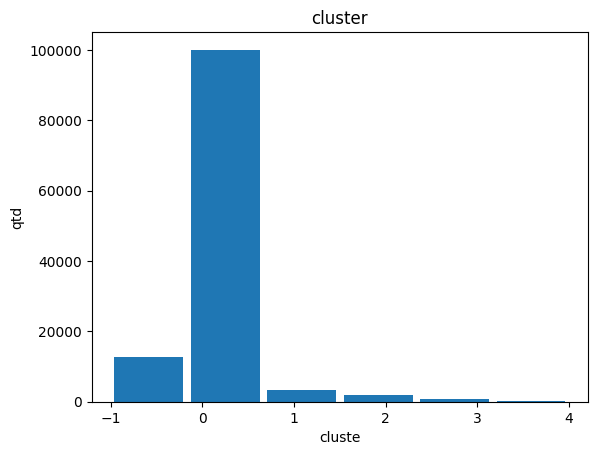

In [194]:
plt.title('cluster')
plt.xlabel('cluste')
plt.ylabel('qtd')
b = X['cluster'].value_counts()
a = X['cluster'][X['cluster']==-1].value_counts()
print (b,a.head(),X.shape,round(a/len(X),4))
plt.hist(X['cluster'], b.count(), rwidth=0.9)


In [ ]:
##ajustar hiperparâmetroas
##verificar bad entre os clusters
##verificar dentro do cluster possíveis concentrações de elementos das variáveis
##executar árvore de decisão retirando o cluster encontrado